In [110]:
import numpy as np

class Neuron:

    def __init__(self, number_of_inputs, l, activation_function = lambda x: np.sign(x)):
        self.input = np.zeros(number_of_inputs)
        self.l = l
        self.weights = np.zeros(number_of_inputs, dtype = 'int')
        self.activation_function = activation_function
        
    def calculate_output(self, neuron_input):
        self.input = neuron_input
        self.output = self.activation_function(np.sum(neuron_input[i]*self.weights[i] for i in range(len(self.weights))))
        return self.output
    
    def teta_function(self, sigma, tay):
        return 0 if sigma != tay else 1 #!
    
    def norm_function(self, z):
        if z <= - self.l: return - self.l
        elif z >= self.l: return self.l
        else:             return z
    
    def update_weights(self, tay):
        for i in range(len(self.weights)):
            self.weights[i] = self.norm_function(self.weights[i] +
                                                 int(self.input[i]*self.output*self.teta_function(self.output, tay)))
    
class TPM:

    def __init__(self, l, k, n):
        self.l = l
        self.k = k
        self.n = n
        self.hidden_layer = [Neuron(n, l) for i in range(k)]
    
    def weights_initialization(self, init_weights):
        for i in range(self.k):
            self.hidden_layer[i].weights = init_weights[self.n*i:self.n*(i + 1)]#self.hashf(init_weights[self.n*i:self.n*(i + 1) - 1], i) 
    
    def get_weights(self):
        answer = []
        for i in range(self.k):
            answer.append(self.hidden_layer[i].weights)
        return np.reshape(answer, self.k*self.n)
        
    def __repr__(self):
        return 'TPM consists of ' + str(self.k) + ' neurons in hidden layer with ' + str(self.n) + ' inputs in each. ' + \
                'Weights of neurons are following: ' + str([str(self.hidden_layer[i].weights) for i in range(self.k)])

        
    def calculate_output(self, TPM_input):
        self.output = np.prod(list(self.hidden_layer[i].calculate_output(TPM_input[self.n*i:self.n*(i + 1)]) for i in range(self.k)))
        return self.output
    
    def update(self):
        for i in range(self.k):
            self.hidden_layer[i].update_weights(self.output)

## Encoding each decimal number into triplet for L = 2

In [111]:
itt = 0
encode = {}
for i in range(-2, 3):
    for j in range(-2, 3):
        for k in range(-2, 3):
            encode[str(itt)] = [i, j, k]
            itt += 1
while (itt < 2**7):
    encode[str(itt)] = [i, j, k]
    itt += 1

In [112]:
encode

{'0': [-2, -2, -2],
 '1': [-2, -2, -1],
 '2': [-2, -2, 0],
 '3': [-2, -2, 1],
 '4': [-2, -2, 2],
 '5': [-2, -1, -2],
 '6': [-2, -1, -1],
 '7': [-2, -1, 0],
 '8': [-2, -1, 1],
 '9': [-2, -1, 2],
 '10': [-2, 0, -2],
 '11': [-2, 0, -1],
 '12': [-2, 0, 0],
 '13': [-2, 0, 1],
 '14': [-2, 0, 2],
 '15': [-2, 1, -2],
 '16': [-2, 1, -1],
 '17': [-2, 1, 0],
 '18': [-2, 1, 1],
 '19': [-2, 1, 2],
 '20': [-2, 2, -2],
 '21': [-2, 2, -1],
 '22': [-2, 2, 0],
 '23': [-2, 2, 1],
 '24': [-2, 2, 2],
 '25': [-1, -2, -2],
 '26': [-1, -2, -1],
 '27': [-1, -2, 0],
 '28': [-1, -2, 1],
 '29': [-1, -2, 2],
 '30': [-1, -1, -2],
 '31': [-1, -1, -1],
 '32': [-1, -1, 0],
 '33': [-1, -1, 1],
 '34': [-1, -1, 2],
 '35': [-1, 0, -2],
 '36': [-1, 0, -1],
 '37': [-1, 0, 0],
 '38': [-1, 0, 1],
 '39': [-1, 0, 2],
 '40': [-1, 1, -2],
 '41': [-1, 1, -1],
 '42': [-1, 1, 0],
 '43': [-1, 1, 1],
 '44': [-1, 1, 2],
 '45': [-1, 2, -2],
 '46': [-1, 2, -1],
 '47': [-1, 2, 0],
 '48': [-1, 2, 1],
 '49': [-1, 2, 2],
 '50': [0, -2, -2],


## Generate Alice and Bob keys

In [125]:
import random
import string

order = 6

fa = open("AliceKey.bin", "wb")
fb = open("BobKey.bin", "wb")
    
for i in range(10**order):
    symbol = random.choice(string.printable)
    fa.write( str(symbol).encode('ascii') )
    shift = random.randint(-1, 1)
    fb.write( str( chr(ord(symbol) + shift)).encode('ascii') ) 

## Read keys from files and encode them

In [126]:
AliceKeyFile = []
AliceString = ''
with open("AliceKey.bin", "rb") as f:
    byte = f.read(1)
    while byte != b'':
        #print(byte)
        AliceString = AliceString + bin(ord(byte))[2:].zfill(8)
        while len(AliceString) > 7:
            for i in range(3):
                AliceKeyFile.append(encode[str(int(AliceString[:7], 2))][i])
            #print( encode[int(AliceString[:7], 2)] )
            AliceString = AliceString[7:]
            #print(len(AliceString))
        #AliceKeyFile.append(int(ord(byte)))
        byte = f.read(1)

In [127]:
type(AliceKeyFile[0])

int

In [128]:
len(AliceKeyFile)

34284

In [129]:
#print(AliceKeyFile)

In [130]:
BobKeyFile = []
BobString = ''
with open("BobKey.bin", "rb") as f:
    byte = f.read(1)
    while byte != b'':
        BobString = BobString + bin(ord(byte))[2:].zfill(8)
        while len(BobString) > 7:
            for i in range(3):
                BobKeyFile.append(encode[str(int(BobString[:7], 2))][i])
            #print(int(AliceKeyString[:7], 2))
            BobString = BobString[7:]
            #print(len(AliceString))
        #AliceKeyFile.append(int(ord(byte)))
        byte = f.read(1)

In [131]:
len(BobKeyFile)

34284

## Function that counts difference between to arrays of numbers

In [132]:
n = 30000
k = 3
def count_diff(arr1, arr2):
    count = 0
    for i in range(len(arr1)):
        if arr1[i] != arr2[i]:
            count += 1
    return 1.0*count/len(arr1)
count_diff(AliceKeyFile[:n*k], BobKeyFile[:n*k])

0.44840158674600394

## One TPM run

In [133]:
import random
l = 3
k = 2
n = 10000#int(len(AliceKey)/3)

AliceKey = AliceKeyFile[:n*k]#[:3*int(len(AliceKey)/3)]
BobKey = BobKeyFile[:n*k]#[:3*int(len(AliceKey)/3)]
#for i in range(n*k):
    #AliceKey[i] = -3 + AliceKey[i] % 7
    #BobKey[i] = -3 + BobKey[i] % 7

Alice_TPM = TPM(l, k, n)
Bob_TPM = TPM(l, k, n)
#AliceKey = [250, 53, 250, 50, 50, 120, 1, 233, 245, 20, 9, 44, 243, 0, 77]
#BobKey = [215, 153, 222, 23, 48, 9, 128, 31, 14, 22, 0, 202, 105, 201, 224]
        


import progressbar
from time import sleep, time
bar = progressbar.ProgressBar(maxval=6000, widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()
timing = []
synchr_itt = []

Alice_TPM.weights_initialization(AliceKey)
Bob_TPM.weights_initialization(BobKey)
difference = [count_diff(AliceKey, BobKey)]
steps = [0]
    
for i in range(1000):
    start_time = time()
    input_random = np.zeros(n*k)
    for x in range(n*k):
        z = random.randrange(-1, 1)
        if z == 0: z = 1
        input_random[x] = z
    Alice_TPM.calculate_output(input_random)
    Bob_TPM.calculate_output(input_random)
    if Alice_TPM.output == Bob_TPM.output:
        Alice_TPM.update()
        Bob_TPM.update()
    steps.append(i)
    c_diff = count_diff(Alice_TPM.get_weights(), Bob_TPM.get_weights())
    difference.append(c_diff)
    stop_time = time()
    timing.append(stop_time - start_time)
    bar.update(i + 1)


bar.finish()
print(np.mean(timing))


/home/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  del sys.path[0]


0.15930397415161132


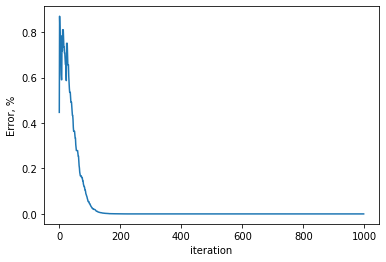

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline  
#plt.ylim((0, 0.8))
plt.ylabel('Error, %')
plt.xlabel('iteration')
plt.plot(steps[:1000], difference[:1000])

In [135]:
AliceKey

[-1,
 -2,
 -1,
 0,
 2,
 0,
 1,
 -2,
 0,
 -2,
 2,
 -2,
 -1,
 -2,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -2,
 0,
 0,
 1,
 -2,
 2,
 -1,
 1,
 0,
 1,
 0,
 2,
 2,
 -2,
 -1,
 0,
 -2,
 -1,
 2,
 -1,
 2,
 -2,
 -1,
 -1,
 2,
 1,
 2,
 -2,
 -2,
 2,
 -1,
 1,
 -1,
 2,
 0,
 2,
 1,
 -2,
 -2,
 1,
 -2,
 -2,
 -1,
 2,
 -2,
 -2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 -2,
 -2,
 -1,
 1,
 -2,
 -1,
 -1,
 -1,
 0,
 1,
 2,
 -1,
 -2,
 2,
 1,
 0,
 -1,
 -1,
 -2,
 0,
 2,
 -2,
 0,
 -1,
 -1,
 -2,
 1,
 0,
 1,
 -2,
 -2,
 -1,
 0,
 -1,
 -2,
 -2,
 -2,
 -1,
 0,
 -1,
 2,
 1,
 -1,
 2,
 1,
 2,
 0,
 0,
 -2,
 0,
 2,
 2,
 0,
 2,
 -1,
 2,
 -2,
 -1,
 0,
 0,
 2,
 -1,
 1,
 -2,
 1,
 -1,
 -2,
 -2,
 -1,
 2,
 0,
 -1,
 0,
 1,
 -2,
 2,
 0,
 2,
 1,
 0,
 1,
 2,
 2,
 1,
 -2,
 -2,
 -2,
 -2,
 1,
 2,
 1,
 -1,
 0,
 2,
 -1,
 -1,
 0,
 -1,
 -2,
 2,
 -1,
 0,
 -1,
 -2,
 -2,
 0,
 2,
 2,
 1,
 -1,
 -2,
 2,
 -2,
 2,
 2,
 0,
 1,
 -2,
 -1,
 -2,
 -2,
 -2,
 2,
 -1,
 -2,
 0,
 2,
 -2,
 1,
 2,
 -2,
 1,
 0,
 1,
 -2,
 0,
 -2,
 2,
 2,
 -1,
 2,
 2,
 0,
 -2,
 -1,
 1,
 -2,
 2,
 1,
 -2,
 -

In [137]:
count_diff(AliceKey, Alice_TPM.get_weights())

0.8626

## k = 7, l = 3, n = 10000

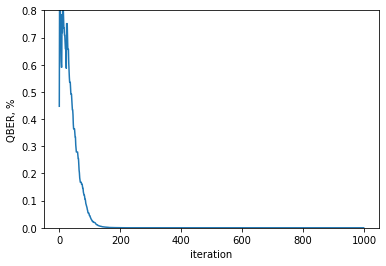

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.ylim((0, 0.8))
plt.ylabel('QBER, %')
plt.xlabel('iteration')
plt.plot(steps, difference)

Text(0,0.5,u'time, s')

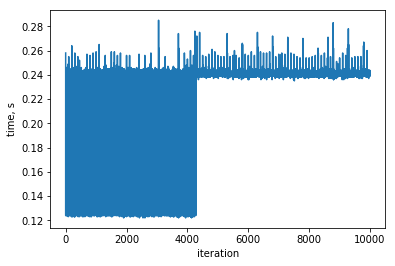

In [0]:
plt.plot(timing)
plt.xlabel('iteration')
plt.ylabel('time, s')

## n = 50000

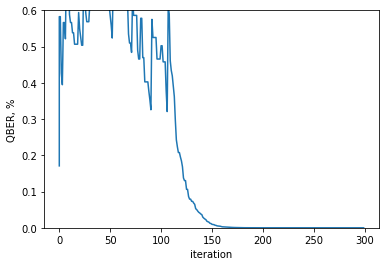

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.ylim((0, 0.6))
plt.ylabel('QBER, %')
plt.xlabel('iteration')
plt.plot(steps, difference)

Text(0,0.5,u'time, s')

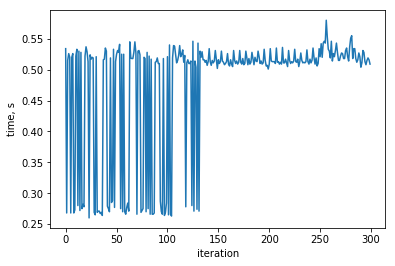

In [0]:
plt.plot(timing)
plt.xlabel('iteration')
plt.ylabel('time, s')

## n = 10000

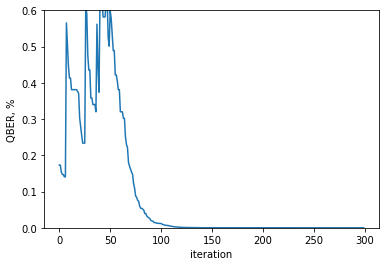

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.ylim((0, 0.6))
plt.ylabel('QBER, %')
plt.xlabel('iteration')
plt.plot(steps, difference)

Text(0,0.5,u'time, s')

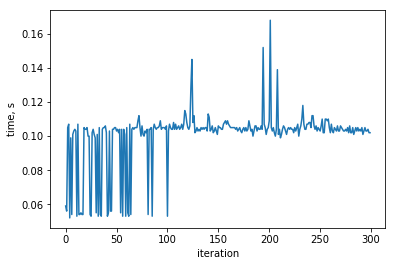

In [0]:
plt.plot(timing)
plt.xlabel('iteration')
plt.ylabel('time, s')

### n = 30000

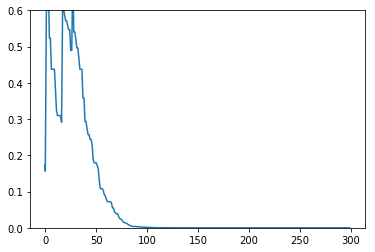

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.ylim((0, 0.6))
plt.plot(steps, difference)

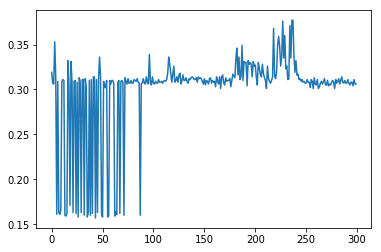

In [0]:
plt.plot(timing)

## Поиск оптимальных параментров k & n для заданного числа битов

Важные массивы: <br>
timing - время на итерацию <br>
synchr_time - число итераций, за которе машины синхронизуются <br>
trajectories - зависимость части ошибочных бит от номера итерации. В клеточке ниже его нет!

In [139]:
import random
l = 2
k = 3
n = 1000#int(len(AliceKey)/3)
arr_k = [2, 3, 4, 5, 6, 8, 10, 20, 30, 40, 50, 60, 100]
arr_n = [1500, 1000, 750, 600, 500, 375, 300, 150, 100, 75, 60, 50, 30]

AliceKey = AliceKeyFile[:n*k]#[:3*int(len(AliceKey)/3)]
BobKey = BobKeyFile[:n*k]#[:3*int(len(AliceKey)/3)]
#for i in range(n*k):
    #AliceKey[i] = -3 + AliceKey[i] % 7
    #BobKey[i] = -3 + BobKey[i] % 7

Alice_TPM = TPM(l, k, n)
Bob_TPM = TPM(l, k, n)
#AliceKey = [250, 53, 250, 50, 50, 120, 1, 233, 245, 20, 9, 44, 243, 0, 77]
#BobKey = [215, 153, 222, 23, 48, 9, 128, 31, 14, 22, 0, 202, 105, 201, 224]
        


import progressbar
from time import sleep, time
timing = []
synchr_time = []

for k, n in zip(arr_k, arr_n):
    bar = progressbar.ProgressBar(maxval=5000, widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()
    for s in range(5000):
        s_itt = np.inf
        Alice_TPM.weights_initialization(AliceKey)
        Bob_TPM.weights_initialization(BobKey)
        difference = [count_diff(AliceKey, BobKey)]
        #print(count_diff(AliceKey, BobKey))
        steps = [0]
        synchr_itt = []
        for i in range(5000):
            start_time = time()
            input_random = np.zeros(n*k)
            for x in range(n*k):
                z = random.randrange(-1, 1)
                if z == 0: z = 1
                input_random[x] = z
            #print(input_random)
            Alice_TPM.calculate_output(input_random)
            Bob_TPM.calculate_output(input_random)
            if Alice_TPM.output == Bob_TPM.output:
                Alice_TPM.update()
                Bob_TPM.update()
                #print('Yep', Alice_TPM.output, Alice_TPM.get_weights())
            #print(i)
            steps.append(i)
            c_diff = count_diff(Alice_TPM.get_weights(), Bob_TPM.get_weights())
            difference.append(c_diff)
            stop_time = time()
            timing.append(stop_time - start_time)
            if c_diff == 0:
                s_itt = i
                break
        #trajectories.append(difference)
        synchr_itt.append(s_itt)
        bar.update(s + 1)
    bar.finish()
    synchr_time.append(np.mean(synchr_itt))

print(np.mean(timing))


/home/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  del sys.path[0]


KeyboardInterrupt: 

## Размер круга пропорционален среднему времени синхронизации. Расчет производился для 3000 бит, L = 2 и 5000 различных TPM

In [0]:
from plotly.offline import plot, iplot
import plotly.graph_objs as go
import numpy as np
import plotly

#data = [synchr_time]
layout = go.Layout(
    xaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        showline=True,
        ticks='',
        showticklabels=False
    ),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        showline=True,
        ticks='',
        showticklabels=False
    )
)
fig = [go.Scatter(x = arr_n, y = arr_k, mode='markers', 
                    marker=dict(color='purple', size=np.asarray(synchr_time)*0.2, opacity=1))]
iplot(fig)

In [0]:
fig = go.Figure(data=[go.Scatter3d(x= arr_n, y = arr_k, z = synchr_time, mode='markers')])
fig.show()

In [0]:
import psutil
# logical=True counts threads, but we are interested in cores
psutil.cpu_count(logical=False)

4

In [0]:
# make sure to always use multiprocess
from multiprocess import Pool
# start your parallel workers at the beginning of your script
pool = Pool(4)

def your_function(a):
    print('Upi!', a)
    return a
    
def another_function(a):
    print('Wow!', a*a)
    return a*a

# execute a computation(s) in parallel
pool.map(your_function, [0, 2, 4])
pool.map(another_function, [1, 3, 5])

# turn off your parallel workers at the end of your script
pool.close()

In [0]:
result2

[1, 9, 25]

In [0]:
from multiprocessing import Pool
pool = Pool(psutil.cpu_count(logical=False))
pool.close()

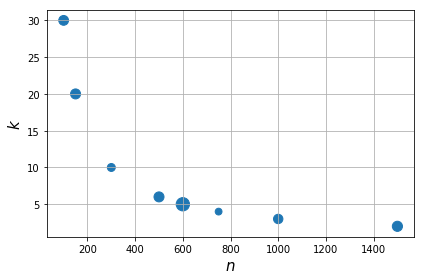

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(arr_n, arr_k, s = synchr_time, alpha=1)

ax.set_xlabel(r'$n$', fontsize=15)
ax.set_ylabel(r'$k$', fontsize=15)
#ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

#plt.title('K = 3, L = 3, N = 10000')

## То же самое для других параметров

Важные массивы: <br>
timing - время на итерацию <br>
synchr_time - число итераций, за которе машины синхронизуются <br>
trajectories - зависимость части ошибочных бит от номера итерации. Здесь он есть!

In [0]:
from copy import deepcopy
synchr_itt2 = deepcopy(synchr_itt)

In [0]:
l = 3
k = 3
n = 10000
AliceKey2 = []
BobKey2 = []
    
for i in range(n*k):
    AliceKey2.append(random.randrange(-2, 3))
    BobKey2.append(random.randrange(-2, 3))
    
Alice_TPM2 = TPM(l, k, n)
Bob_TPM2 = TPM(l, k, n)

import progressbar
from time import sleep, time

timing2 = []
synchr_itt2 = []
trajectories2 = []
for s in range(500):
    s_itt2 = np.inf
    
    Alice_TPM2.weights_initialization(AliceKey2)
    Bob_TPM2.weights_initialization(BobKey2)
    difference2 = [count_diff(AliceKey2, BobKey2)]
    steps2 = [0]
    
    for i in range(600):
        start_time2 = time()
        input_random2 = np.zeros(n*k)
        for x in range(n*k):
            z = random.randrange(-1, 1)
            if z == 0: z = 1
            input_random2[x] = z

        Alice_TPM2.calculate_output(input_random2)
        Bob_TPM2.calculate_output(input_random2)
        if Alice_TPM2.output == Bob_TPM2.output:
            Alice_TPM2.update()
            Bob_TPM2.update()
        steps2.append(i)
        c_diff2 = count_diff(Alice_TPM2.get_weights(), Bob_TPM2.get_weights())
        difference2.append(c_diff2)
        if (c_diff2 == 0) and (s_itt2 == np.inf):
            s_itt2 = i
        stop_time = time()
        timing2.append(stop_time - start_time)
        if s_itt2 < np.inf: break
    trajectories2.append(difference2)
    synchr_itt2.append(s_itt2)
    bar.update(s + 1)

print(np.mean(timing))

(3, 3, 10000)
(3, 3, 10000)


Text(0.5,1,u'K = 3, L = 3, N = 10000')

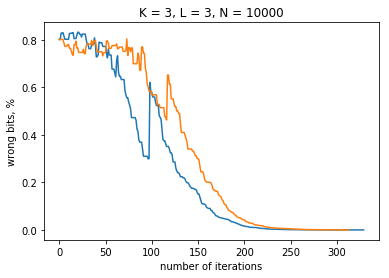

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(2):
    plt.plot(trajectories2[i])
plt.xlabel('number of iterations')
plt.ylabel('wrong bits, %')
plt.title('K = 3, L = 3, N = 10000')
#plt.ylim(0, 0.12)
#plt.xlim(0, 300)

(array([  6.,  20.,  25.,  28.,  16.,  25.,  17.,  18.,  13.,   2.,   6.,
          3.,   4.,   3.,   5.,   2.,   0.,   2.,   2.,   1.,   0.,   0.,
          1.,   0.,   1.]),
 array([ 143.  ,  158.76,  174.52,  190.28,  206.04,  221.8 ,  237.56,
         253.32,  269.08,  284.84,  300.6 ,  316.36,  332.12,  347.88,
         363.64,  379.4 ,  395.16,  410.92,  426.68,  442.44,  458.2 ,
         473.96,  489.72,  505.48,  521.24,  537.  ]),
 <a list of 25 Patch objects>)

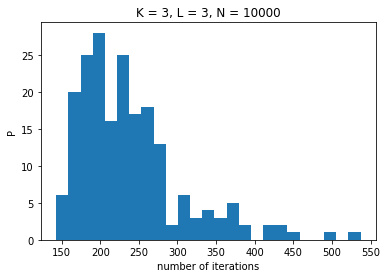

In [0]:
plt.title('K = 3, L = 3, N = 10000')
plt.xlabel('number of iterations')
plt.ylabel('P')
plt.hist(synchr_itt, bins = 25)

Text(0.5,1,u'K = 3, L = 3, N = 10000')

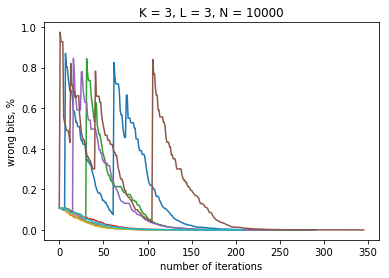

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10):
    plt.plot(trajectories[i])
plt.xlabel('number of iterations')
plt.ylabel('wrong bits, %')
plt.title('K = 3, L = 3, N = 10000')
#plt.ylim(0, 0.12)
#plt.xlim(0, 300)